# Import Necessary dependencies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data

In [4]:
market_sentiment = pd.read_csv("C:\\Users\\akhil\\Downloads\\fear_greed_index.csv")
trader_data = pd.read_csv("C:\\Users\\akhil\\Downloads\\historical_data.csv")


# Explore & Clean the Data

In [8]:
market_sentiment.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [10]:
trader_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [12]:
print(market_sentiment.columns)

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [14]:
# Convert to datetime
market_sentiment['date'] = pd.to_datetime(market_sentiment['date'], errors='coerce').dt.date
trader_data['date'] = pd.to_datetime(trader_data['Timestamp'], errors='coerce').dt.date

In [16]:
market_sentiment.isnull().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

In [18]:
trader_data.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
date                0
dtype: int64

# Merge Datasets

In [21]:
# Corrected date formatting and merge
market_sentiment['date'] = pd.to_datetime(market_sentiment['date'], errors='coerce').dt.strftime('%Y-%m-%d')
trader_data['date'] = pd.to_datetime(trader_data['Timestamp'], errors='coerce').dt.strftime('%Y-%m-%d')

# Perform the merge
merged_df = pd.merge(trader_data, market_sentiment[['date', 'classification']], on='date', how='left')

# Check if the merge worked
print("Classification null values:", merged_df['classification'].isnull().sum())
print("Unique values in Classification:", merged_df['classification'].unique())
print("Sample Classification values:\n", merged_df['classification'].value_counts())


Classification null values: 211224
Unique values in Classification: [nan]
Sample Classification values:
 Series([], Name: count, dtype: int64)


In [23]:
# Print date ranges from both datasets
print("Sentiment date range:", market_sentiment['date'].min(), "to", market_sentiment['date'].max())
print("Trader data date range:", trader_data['date'].min(), "to", trader_data['date'].max())

Sentiment date range: 2018-02-01 to 2025-05-02
Trader data date range: 1970-01-01 to 1970-01-01


In [25]:
print(trader_data['Timestamp'].head(5))
print(trader_data['Timestamp'].dtype)

0    1.730000e+12
1    1.730000e+12
2    1.730000e+12
3    1.730000e+12
4    1.730000e+12
Name: Timestamp, dtype: float64
float64


In [27]:
# Convert Unix timestamp (ms) to datetime
trader_data['time'] = pd.to_datetime(trader_data['Timestamp'], unit='ms', errors='coerce')

# Format to YYYY-MM-DD string
trader_data['date'] = trader_data['time'].dt.strftime('%Y-%m-%d')
market_sentiment['date'] = pd.to_datetime(market_sentiment['date'], errors='coerce').dt.strftime('%Y-%m-%d')

# Merge on 'date'
merged_df = pd.merge(trader_data, market_sentiment[['date', 'classification']], on='date', how='left')

# Check if merge succeeded
print("Classification value counts:\n", merged_df['classification'].value_counts())


Classification value counts:
 classification
Fear             133871
Greed             36289
Neutral            7141
Extreme Greed      6962
Name: count, dtype: int64


# Basic Summary Stats

In [30]:
# Summary statistics by sentiment
summary_df = merged_df.groupby('classification')['Closed PnL'].agg(['count', 'mean', 'std', 'min', 'max'])
print(summary_df)

# Count of trades per sentiment
print(merged_df['classification'].value_counts())


                 count       mean          std           min           max
classification                                                            
Extreme Greed     6962  25.418772   306.166937  -21524.40000    2500.95750
Fear            133871  50.047622   909.121796  -35681.74723  135329.09010
Greed            36289  87.894859  1148.343968 -117990.10410   44223.45187
Neutral           7141  22.229713   633.704815  -18360.67007   18282.19011
classification
Fear             133871
Greed             36289
Neutral            7141
Extreme Greed      6962
Name: count, dtype: int64


In [32]:
# Filter for 'Fear' and 'Greed' only
filtered_df = merged_df[merged_df['classification'].isin(['Fear', 'Greed'])]
filtered_df = filtered_df[['classification', 'Closed PnL']].dropna()

# Visualize Trader PnL by Sentiment

C:\Users\akhil\AppData\Local\Temp\ipykernel_25132\4268710333.py:11: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhil\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


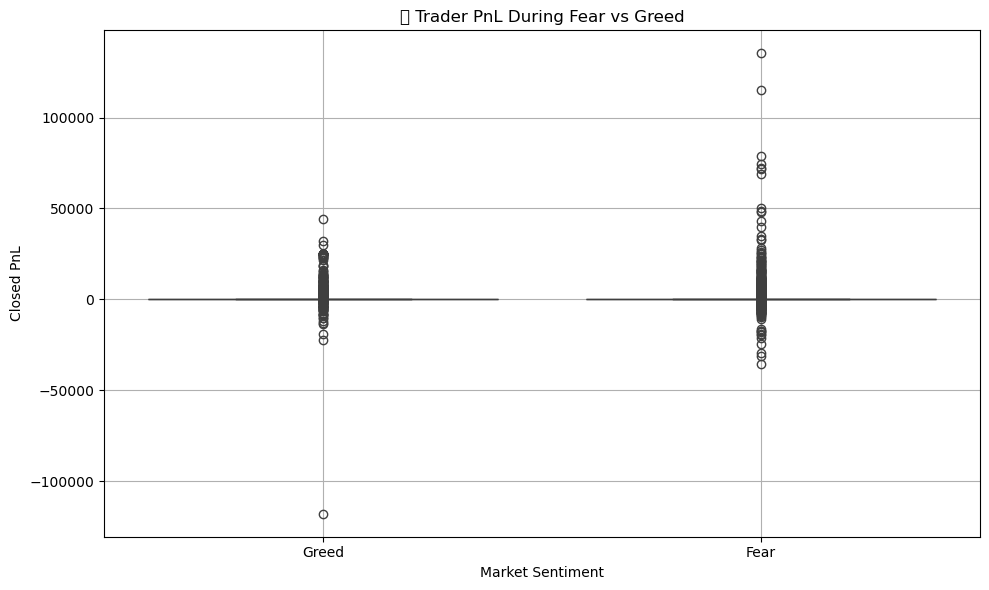

In [35]:
# Boxplot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='classification', y='Closed PnL', data=filtered_df)
plt.title('📉 Trader PnL During Fear vs Greed')
plt.xlabel('Market Sentiment')
plt.ylabel('Closed PnL')
plt.grid(True)
plt.tight_layout()
plt.show()

# Analyze Behavior Patterns (Leverage, Size)

In [38]:
# Group by sentiment (Classification) and calculate average trade size
behavior = merged_df.groupby('classification')[['Size Tokens', 'Size USD']].mean()

# Display results
print("\n Mean Trade Size per Market Sentiment:\n")
print(behavior)



 Mean Trade Size per Market Sentiment:

                 Size Tokens     Size USD
classification                           
Extreme Greed   48736.443323  5660.265764
Fear             3071.523165  5259.977837
Greed            2232.117751  3182.883845
Neutral          1967.302964  3058.848110


# Time Series Trend of Total PnL

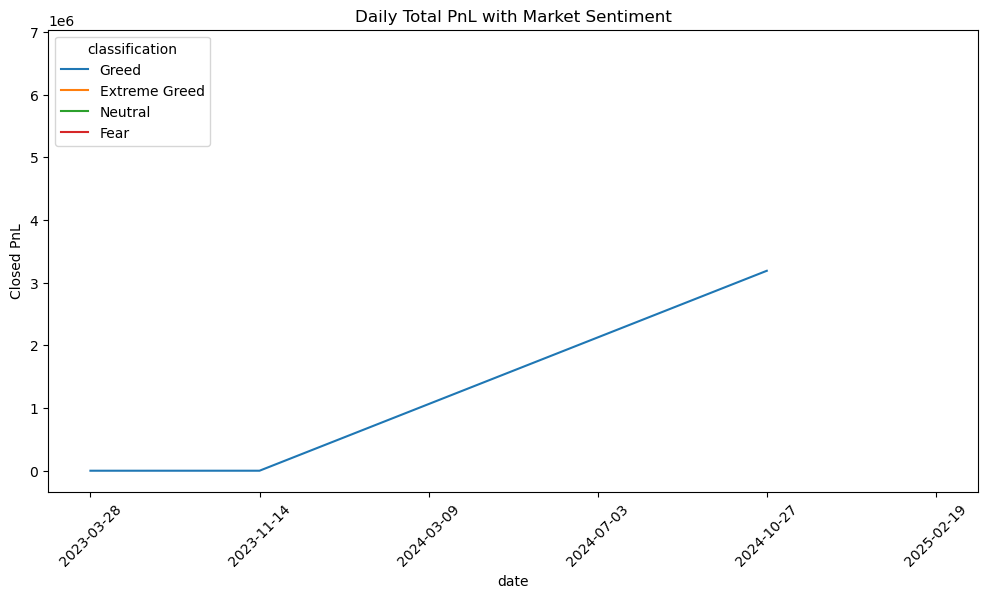

In [41]:
# Total daily PnL
daily_pnl = merged_df.groupby(['date', 'classification'])['Closed PnL'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='date', y='Closed PnL', hue='classification', data=daily_pnl)
plt.title('Daily Total PnL with Market Sentiment')
plt.xticks(rotation=45)
plt.show()


# Clustering for Hidden Patterns

In [44]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select valid columns
features = merged_df[['Closed PnL', 'Size USD', 'Size Tokens']].dropna()

# Scale features
scaler = StandardScaler()
scaled = scaler.fit_transform(features)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
features['cluster'] = kmeans.fit_predict(scaled)

# Add clusters back to merged_df
merged_df.loc[features.index, 'cluster'] = features['cluster']

# Show sample results
print(merged_df[['Closed PnL', 'Size USD', 'Size Tokens', 'cluster']].head())

   Closed PnL  Size USD  Size Tokens  cluster
0         0.0   7872.16       986.87      0.0
1         0.0    127.68        16.00      0.0
2         0.0   1150.63       144.09      0.0
3         0.0   1142.04       142.98      0.0
4         0.0     69.75         8.73      0.0


# Visualization

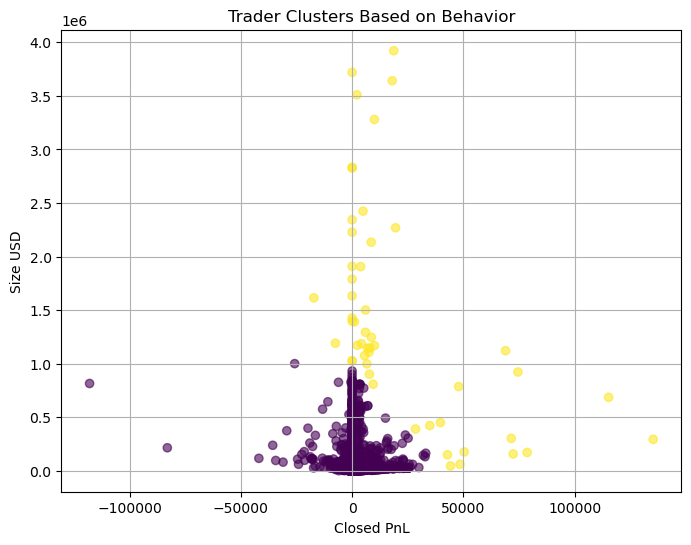

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(features['Closed PnL'], features['Size USD'], c=features['cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Closed PnL')
plt.ylabel('Size USD')
plt.title('Trader Clusters Based on Behavior')
plt.grid(True)
plt.show()

# saved output

In [49]:
# Save final cleaned datase
merged_df.to_csv('trader_sentiment_analysis.csv', index=False)